# Modeling and Simulation 4 - Regression Analysis and Markov Chains

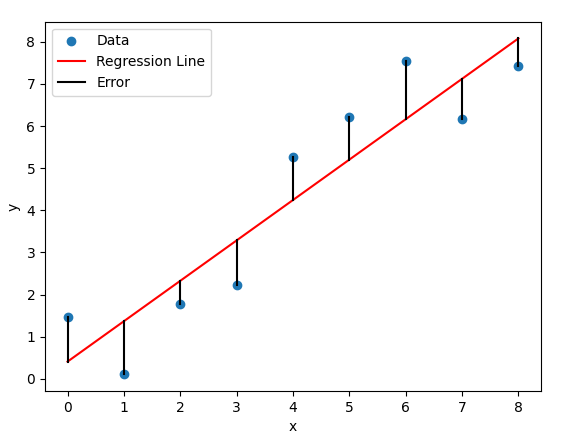

To find the best-fitting line, we need to minimize the distances between the data points and the regression line. You can see these errors above, plotted in black. Do you remember the least squares method? We need to determine the parameters $b_0, b_1$ for the line $y = b_0 + b_1 \cdot x$ such that: $$f(b_0, b_1) = \sum_i \, [y_i - (b_0 + b_1 \cdot x_i)]^2 \, = Min$$ Squaring the difference is required to prevent errors from canceling one another and also to give more weight to bigger errors. A measure of how strongly the data points cluster along the regression line is the correlation coefficient, which can be calculated using the following formula: $$\rho_{X, Y} = \frac{Cov(X, Y)}{\sqrt{D^2(X)} \cdot \sqrt{D^2(Y)}}$$ It only takes values in the range $[-1;\, 1]$:
- a value close to 0 means no correlation
- a value close to 1 means that there is a strong positive correlation (as X increases, Y increases)
- a value close to -1 means that there is a strong negative correlation (as X increases, Y decreases)

Keep in mind that the correlation coefficient only gives us information about how strong the variables cluster along a straight line, but it does not say anything about the slope of the regression line. Now, let's compute the regression line and the correlation coefficient for the previous example.

import random

class Perceptron:
    def __init__(self, num_inputs):
        self.weights = [random.uniform(-1, 1) for _ in range(num_inputs)]
        self.bias = random.uniform(-1, 1)

    def activate(self, x):
        if x > 0:
            return 1
        return 0

    def predict(self, inputs):
        # TODO: Calculate the weighted sum of inputs and add the bias
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * inputs[i]
        weighted_sum += self.bias
        return self.activate(weighted_sum)

    # Inputs will be an array containing the 4 values of the grid, target will be the desired prediction value
    def train(self, inputs, target, lr=0.1):
        # TODO: Compute the error of the perceptron's prediction
        # TODO: Update all the weights according to the formula w_k+1 = w_k + lr * error * inputs
        output = self.predict(inputs)
        error = target - output
        self.weights = [self.weights[i] + lr * error * inputs[i] for i in range(len(inputs))]
        
        # TODO: Update the bias according to the formula bias_k+1 = bias_k + lr * error
        self.bias += lr * error
        return

In [11]:
# Define the variables

# Epochs are "iterations" in machine-learning speech
num_epochs = 1000
# We'll use 3 perceptrons with 4 inputs each.
perceptrons = [Perceptron(4) for _ in range(3)]
for _ in range(num_epochs):
    for i in range(3):
        for j in range(4):
            if i == j:
                perceptrons[i].train(data[j][0], 1)
            else:
                perceptrons[i].train(data[j][0], 0)


# TODO: Train the perceptrons for `num_epochs` iterations
# hint: You should train each perceptron on the whole data set in each iteration.

def predict_grid(grid):
    max = -1
    out = 0
    for i in range(3):
        if perceptrons[i].predict(grid) >= max:
            max = perceptrons[i].predict(grid)
            out = i
    return out

In [12]:
# Test the model
test_data = [
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [0, 1, 0, 1],
    [1, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 0],
]

X = np.column_stack((engineSize, horsePower, mpgCity))

# Fit the regression model

model = LinearRegression()
model.fit(X, price)

# Print regression results
print('Price = {:.3f} + {:.3f} * EngineSize + {:.3f} * HorsePower + {:.3f} * MPG_City'
        .format(model.intercept_, *model.coef_))

print('R-squared: {:.3f}'.format(model.score(X, price)))

Grid: [0, 0, 0, 0], Prediction: 0
Grid: [1, 1, 1, 1], Prediction: 1
Grid: [0, 1, 0, 1], Prediction: 2
Grid: [1, 0, 0, 0], Prediction: 0
Grid: [1, 1, 0, 0], Prediction: 1
Grid: [1, 0, 1, 0], Prediction: 2
Grid: [1, 0, 0, 1], Prediction: 0
Grid: [0, 1, 0, 0], Prediction: 0
Grid: [1, 1, 1, 0], Prediction: 1


The quantity **R-squared** (called the coefficient of determination) represents the variation in price explained by our model. It means that 84.9% of the variation in the price of the cars is explained by the above linear relation. You can play around and change the target variable and the predictors to see if you can obtain a bigger value for the **R-squared**. The coefficient of determintion takes values in the range $[0; 1]$, so the bigger the value, the better the model predicts the price. 

An important thing to know is that the predictors should not be correlated with each other, otherwise the model becomes redundant. For example, if we want to predict the price of a house and we have the size of the house in squared meters and squared centimeters as predictors, the model will not have a good prediction capability because the two independent variables provide redundant information. Let's study our case and see if the predictors are correlated.

![markov chain.jpg](attachment:f2d8a8dc-5ab8-40d0-a68b-5f1a7a4fa263.jpg)

A bull market is the condition of a financial market in which prices are rising or are expected to rise by a significant amount. A bear market is when a market experiences prolonged price declines. The graph above can be interpreted as follows: if its a bull market today, there is a 90% chance that it will be bull market tomorrow, 7.5% chance that it will be bear market and 2.5% chance that the market will be stagnant. We can visualize this better looking at the table below:

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.b1 = np.random.uniform(-1, 1, (1, hidden_size))
        self.W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.b2 = np.random.uniform(-1, 1, (1, output_size))

    def forward(self, x):
        self.z1 = x @ self.W1 + self.b1
        self.a1 = relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        exp_z = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))  # Prevent overflow
        self.a2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return self.a2

    def train(self, x, y, learning_rate=0.1):
        output = self.forward(x)

        # Compute output layer error
        delta_output = output - y

        # Compute gradients for the output layer
        dW2 = self.a1.T @ delta_output
        db2 = np.sum(delta_output, axis=0, keepdims=True)

        # Compute hidden layer error
        delta_hidden = (delta_output @ self.W2.T) * relu_derivative(self.z1)

        # Compute gradients for the hidden layer
        dW1 = np.array(x).T @ delta_hidden
        db1 = np.sum(delta_hidden, axis=0, keepdims=True)

        # Update weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2


In [14]:
import numpy as np

# One-hot encoding function
def one_hot_encode(label, num_classes):
    vec = np.zeros(num_classes)
    vec[label] = 1
    return vec

# Data Preparation
data = [
    (np.array([0, 0, 0, 0]), 0),
    (np.array([1, 1, 1, 1]), 1),
    (np.array([2, 2, 2, 2]), 2),
    (np.array([0, 1, 0, 1]), 0),
    (np.array([1, 2, 1, 2]), 1),
    (np.array([2, 0, 2, 0]), 2),
]

# Network Parameters
input_size = 4
hidden_size = 5
output_size = 3
num_epochs = 5000
learning_rate = 0.01

# Initialize Neural Network
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training Loop
for _ in range(num_epochs):
    for x, label in data:
        x = x.reshape(1, -1)  # Reshape input to (1, input_size)
        y = one_hot_encode(label, output_size).reshape(1, -1)  # One-hot encode output
        nn.train(x, y, learning_rate)

# Prediction Function
def predict_grid(grid):
    grid = np.array(grid).reshape(1, -1)  # Ensure input is in correct shape
    predictions = nn.forward(grid)
    return np.argmax(predictions, axis=1)[0]  # Return index of max confidence


In [16]:
# Test the model
test_data = [
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [2, 2, 2, 2],
    [0, 1, 0, 1],
    [1, 0, 0, 0],
    [2, 0, 2, 0],
    [2, 2, 2, 0],
]

    nextState = ...
    stateName = ...

    return nextState, stateName


def nStates(n):
    # TODO Simulate the possible outcome for the next n days
    # Return the state record
    stateRecord = None

    return stateRecord

def findLimit():
    # TODO Multiply the transition matrix with the probability vector until no change occurs anymore
    # Return the limit
    outcome = None

    return outcome

Grid: [0, 0, 0, 0], Prediction: 0
Grid: [1, 1, 1, 1], Prediction: 1
Grid: [2, 2, 2, 2], Prediction: 2
Grid: [0, 1, 0, 1], Prediction: 0
Grid: [1, 0, 0, 0], Prediction: 0
Grid: [2, 0, 2, 0], Prediction: 2
Grid: [2, 2, 2, 0], Prediction: 2


In [ ]:
# Compute the predictions for the next n days and the limit of the probability vector

n = 10
stateRecord = nStates(n)

print(f'Today: {stateRecord[0]}')

for idx, state in enumerate(stateRecord[1:]):
    print(f'Day {idx + 1} prediction: {state}.')

print(f'The limit for the probability vector is: {findLimit()}')